In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv("C:/Users/anupr/Documents/External Courses/Udemy - datascience/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/EcommerceCustomers.csv")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


AttributeError: 'AxesSubplot' object has no attribute 'plt'

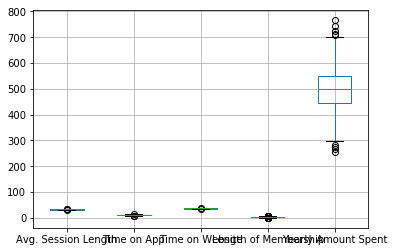

In [20]:
customers.boxplot().plt.xticks(rotation=45)

In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


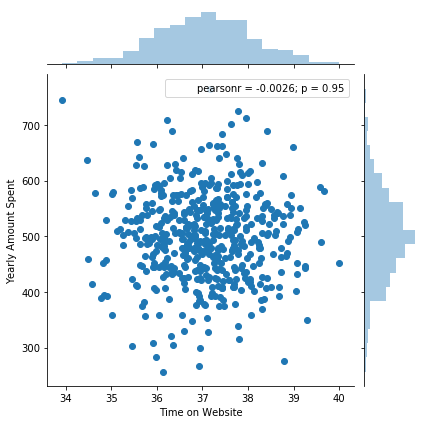

In [26]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

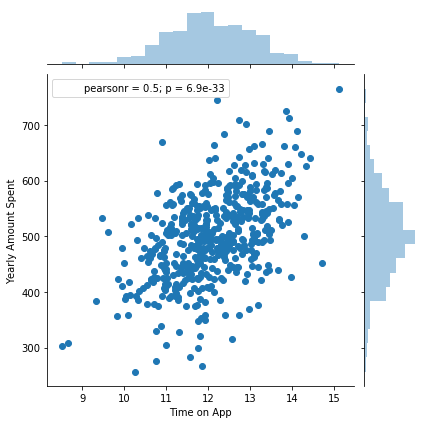

In [5]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

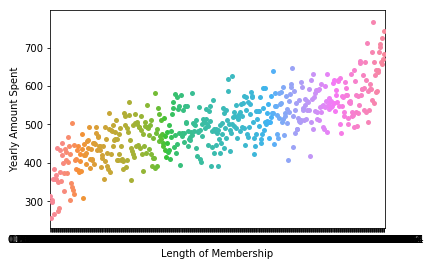

In [11]:
sns.swarmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

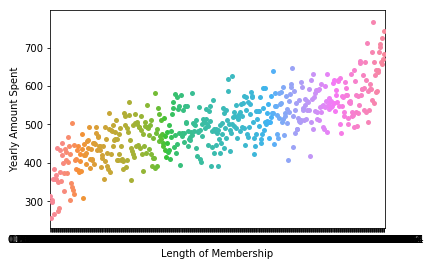

In [12]:
sns.stripplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

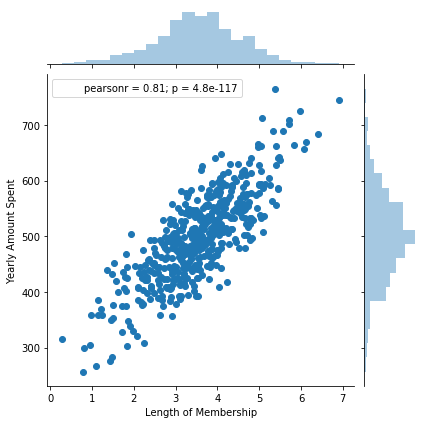

In [13]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

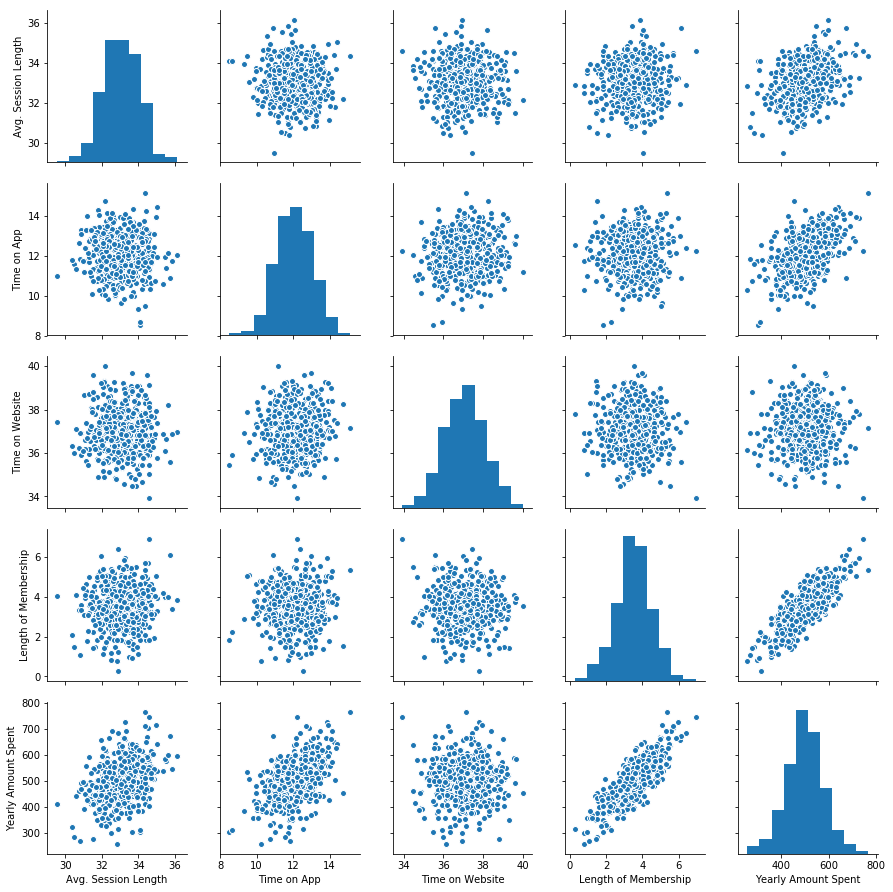

In [14]:
sns.pairplot(customers)

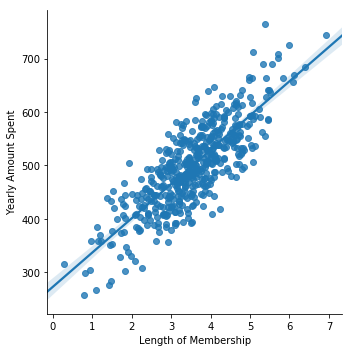

In [15]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [19]:
y = customers['Yearly Amount Spent']
x = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=10101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
lm.coef_

array([ 25.40476259,  38.74293989,   0.49340827,  61.75535852])

In [24]:
prediction = lm.predict(x_test)

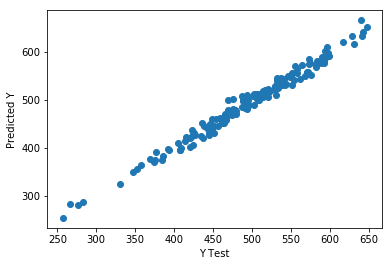

In [28]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

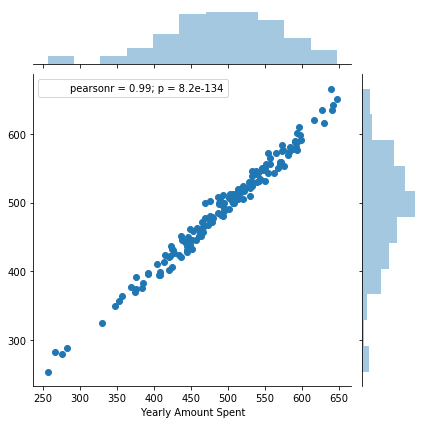

In [29]:
sns.jointplot(y_test,prediction)

(array([  3.,   1.,   6.,   9.,  36.,  31.,  19.,  28.,  11.,   6.]),
 array([-29.94998832, -24.59942345, -19.24885858, -13.89829371,
         -8.54772884,  -3.19716397,   2.1534009 ,   7.50396577,
         12.85453064,  18.20509551,  23.55566038]),
 <a list of 10 Patch objects>)

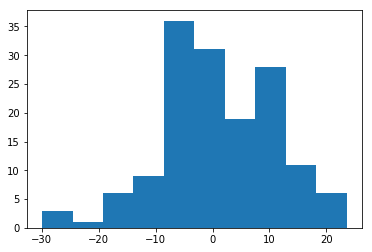

In [30]:
#Residuals
plt.hist(y_test-prediction)

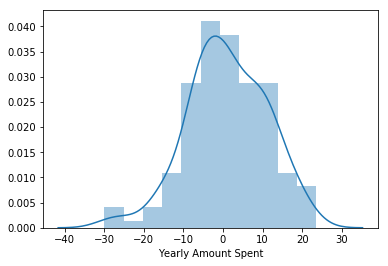

In [31]:
#Residuals - normal
sns.distplot(y_test-prediction)

In [32]:
#Summary
import statsmodels.api as sm


C:\Users\anupr\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [35]:
model = sm.OLS(y_train,x_train).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 4.644e+04
Date:                 Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                         00:05:17   Log-Likelihood:                -1577.3
No. Observations:                  350   AIC:                             3163.
Df Residuals:                      346   BIC:                             3178.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     10.9023      0.885     12.320      0.000       9.162      12.643
Time on App             35.3284      1.162     30.412      0.000      33.044      37.613
Time on Website        -13.5026      0.823    -16.408      0.000     -15.121     -11.884
Length of Membership    60.4444      1.194     50.617      0.000      58.096      62.793
==============================================================================
Omnibus:                        0.560   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.681
Skew:                           0.068   Prob(JB):                        0.711
Kurtosis:                       2.831   Cond. No.                         56.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""